# Business Intelligent Sales Analysis For getINNOtized

## Overview
This project provides an end to end business intelligence solution for a sales company.
The aim of this project is to come up with a business intelligence solutions that can be applied to provide efficiency and boost sales.

## Business Understanding 

### Objective
The goal of this project is to provide an end to end business intelligence solution and come up with an efficient strategy to boost sales.

### Explanation of Features 
- Order_ID : Unique value assigned to each item ordered 
- Product  : Name or description of the product being ordered.
- Quantity_Ordered : Number of items of the product that were ordered
- Price_Each       : Unit price of each individual item 
- Order_Date       : Date and time when the order was placed
- Purchase_Address : Address or location where the order was delivered.

### Hypothesis

H0: The price of a product does not significantly affect the quantity ordered.

H1: The price of a product has a significant impact on the quantity ordered.

### Analytical Questions
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

## Data Understanding 

In [1]:
# import Packages
import os 
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load All Datatsets
jan = pd.read_csv('data/Sales_January_2019.csv')
feb = pd.read_csv('data/Sales_February_2019.csv')
march = pd.read_csv('data/Sales_March_2019.csv')
april = pd.read_csv('data/Sales_April_2019.csv')
may = pd.read_csv('data/Sales_May_2019.csv')
june = pd.read_csv('data/Sales_June_2019.csv')

jul = pd.read_csv('assests/july_data')
aug = pd.read_csv('assests/aug_data')
sep = pd.read_csv('assests/sep_data')
oct = pd.read_csv('assests/oct_data')
nov = pd.read_csv('assests/nov_data')
dec = pd.read_csv('assests/dec_data')


In [3]:
# Create Month column and display January first few rows
jan['Month'] = 1
jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [4]:
# dispaly january dataframe information
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
 6   Month             9723 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 531.9+ KB


In [5]:
# Create Month column and display February first few rows
feb['Month'] = 2
feb.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


In [6]:
# dispaly February dataframe information
feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          12004 non-null  object
 1   Product           12004 non-null  object
 2   Quantity Ordered  12004 non-null  object
 3   Price Each        12004 non-null  object
 4   Order Date        12004 non-null  object
 5   Purchase Address  12004 non-null  object
 6   Month             12036 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 658.3+ KB


In [7]:
# Create Month column and display March first few rows
march['Month'] = 3
march.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [8]:
# dispaly March dataframe information
march.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
 6   Month             15226 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 832.8+ KB


In [9]:
# Create Month column and display April first few rows
april['Month'] = 4
april.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,NaN,NaN,NaN,NaN,NaN,NaN,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [10]:
#  dispaly April dataframe information
april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
 6   Month             18383 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1005.4+ KB


In [11]:
#Create Month column and display May first few rows
may['Month'] = 5
may.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [12]:
#dispaly May dataframe information
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          16587 non-null  object
 1   Product           16587 non-null  object
 2   Quantity Ordered  16587 non-null  object
 3   Price Each        16587 non-null  object
 4   Order Date        16587 non-null  object
 5   Purchase Address  16587 non-null  object
 6   Month             16635 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 909.9+ KB


In [13]:
# Create Month column and display June first few rows
june['Month'] = 6
june.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


In [14]:
# dispaly June dataframe information
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          13579 non-null  object
 1   Product           13579 non-null  object
 2   Quantity Ordered  13579 non-null  object
 3   Price Each        13579 non-null  object
 4   Order Date        13579 non-null  object
 5   Purchase Address  13579 non-null  object
 6   Month             13622 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 745.1+ KB


In [15]:
# Create Month column and display July first few rows
jul['Month'] = 7
jul.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301",7
1,1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101",7
2,2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301",7
3,3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301",7
4,4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101",7


In [16]:
# dispaly Jyly dataframe information
jul.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14371 non-null  int64  
 1   Order_ID          14291 non-null  float64
 2   Product           14326 non-null  object 
 3   Quantity_Ordered  14291 non-null  float64
 4   Price_Each        14291 non-null  float64
 5   Order_Date        14291 non-null  object 
 6   Purchase_Address  14326 non-null  object 
 7   Month             14371 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 898.3+ KB


In [17]:
# Create Month column and display August first few rows
aug['Month'] = 8
aug.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101",8
1,1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001",8
2,2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035",8
3,3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001",8
4,4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001",8


In [18]:
# dispaly August dataframe information
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12011 non-null  int64  
 1   Order_ID          11957 non-null  float64
 2   Product           11983 non-null  object 
 3   Quantity_Ordered  11957 non-null  float64
 4   Price_Each        11957 non-null  float64
 5   Order_Date        11957 non-null  object 
 6   Purchase_Address  11983 non-null  object 
 7   Month             12011 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 750.8+ KB


In [19]:
# Create Month column and display September first few rows
sep['Month'] = 9
sep.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001",9
1,1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301",9
2,2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001",9
3,3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101",9
4,4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301",9


In [20]:
# dispaly september dataframe information
sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11686 non-null  int64  
 1   Order_ID          11629 non-null  float64
 2   Product           11646 non-null  object 
 3   Quantity_Ordered  11629 non-null  float64
 4   Price_Each        11629 non-null  float64
 5   Order_Date        11629 non-null  object 
 6   Purchase_Address  11646 non-null  object 
 7   Month             11686 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 730.5+ KB


In [21]:
# Create Month column and display October first few rows
oct['Month'] = 10
oct.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001",10
1,1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001",10
2,2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001",10
3,3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001",10
4,4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001",10


In [22]:
# dispaly October dataframe information
oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20379 non-null  int64  
 1   Order_ID          20284 non-null  float64
 2   Product           20317 non-null  object 
 3   Quantity_Ordered  20284 non-null  float64
 4   Price_Each        20284 non-null  float64
 5   Order_Date        20284 non-null  object 
 6   Purchase_Address  20317 non-null  object 
 7   Month             20379 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 1.2+ MB


In [23]:
# Create Month column and display November first few rows
nov['Month'] = 11
nov.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001",11
1,1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301",11
2,2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001",11
3,3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101",11
4,4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215",11


In [24]:
# dispaly November dataframe information
nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17661 non-null  int64  
 1   Order_ID          17580 non-null  float64
 2   Product           17616 non-null  object 
 3   Quantity_Ordered  17580 non-null  float64
 4   Price_Each        17580 non-null  float64
 5   Order_Date        17580 non-null  object 
 6   Purchase_Address  17616 non-null  object 
 7   Month             17661 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 1.1+ MB


In [25]:
# Create Month column and display December first few rows
dec['Month'] = 12
dec.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001",12
1,1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001",12
2,2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001",12
3,3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016",12
4,4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301",12


In [26]:
# dispaly December dataframe information
dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        25117 non-null  int64  
 1   Order_ID          24989 non-null  float64
 2   Product           25037 non-null  object 
 3   Quantity_Ordered  24989 non-null  float64
 4   Price_Each        24989 non-null  float64
 5   Order_Date        24989 non-null  object 
 6   Purchase_Address  25037 non-null  object 
 7   Month             25117 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 1.5+ MB


In [27]:
# concantenate first six month datasets
first_six = pd.concat([jan,feb,march,april,may,june], axis=0)
first_six

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


In [28]:
# display first six month concise information
first_six.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
 6   Month             85625 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 5.2+ MB


In [29]:
#  Display the count of missing values for each column
first_six.isnull().sum()


Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
Month                 0
dtype: int64

In [30]:
# check for duplicates
first_six.duplicated().sum()

501

In [31]:
#concantenate second six months
second_six = pd.concat([jul,aug,sep,oct,nov,dec], axis=0)
second_six

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301",7
1,1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101",7
2,2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301",7
3,3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301",7
4,4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101",7
...,...,...,...,...,...,...,...,...
25112,25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016",12
25113,25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001",12
25114,25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101",12
25115,25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001",12


In [32]:
# display first six month concise information
second_six.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        101225 non-null  int64  
 1   Order_ID          100730 non-null  float64
 2   Product           100925 non-null  object 
 3   Quantity_Ordered  100730 non-null  float64
 4   Price_Each        100730 non-null  float64
 5   Order_Date        100730 non-null  object 
 6   Purchase_Address  100925 non-null  object 
 7   Month             101225 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.0+ MB


In [33]:
#  Display the count of missing values for each column
second_six.isnull().sum()

Unnamed: 0            0
Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
Month                 0
dtype: int64

In [34]:
# check for duplicates
second_six.duplicated().sum()

0

## Data Cleaning and Preparation 

In [35]:
# display first few rows
merge_1 =first_six
merge_1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [36]:
# rename columns
merge_1.rename(columns={'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each':'Price_Each',
                          'Order Date':'Order_Date','Purchase Address':'Purchase_Address'}, inplace=True)
merge_1.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [37]:
# check first six month general information
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity_Ordered  85380 non-null  object
 3   Price_Each        85380 non-null  object
 4   Order_Date        85380 non-null  object
 5   Purchase_Address  85380 non-null  object
 6   Month             85625 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 5.2+ MB


In [38]:
# Check for non-numeric or missing values in 'Order_ID' column
non_numeric_values = merge_1['Order_ID'].loc[merge_1['Order_ID'].astype(str).str.isdigit()]
missing_values = merge_1['Order_ID'].loc[merge_1['Order_ID'].isnull()]

In [39]:
# Print non-numeric and missing values
print("Non-numeric values in 'Order_ID':", non_numeric_values)
print("Missing values in 'Order_ID':", missing_values)


Non-numeric values in 'Order_ID': 0        141234
1        141235
2        141236
3        141237
4        141238
          ...  
13617    222905
13618    222906
13619    222907
13620    222908
13621    222909
Name: Order_ID, Length: 85220, dtype: object
Missing values in 'Order_ID': 664      NaN
678      NaN
797      NaN
876      NaN
1299     NaN
        ... 
12567    NaN
12640    NaN
12659    NaN
12732    NaN
13352    NaN
Name: Order_ID, Length: 245, dtype: object


In [40]:
# Convert 'Order_ID' to float, handling errors
merge_1['Order_ID'] = pd.to_numeric(merge_1['Order_ID'], errors='coerce')

In [41]:
# Check for non-numeric values in 'Quantity_Ordered' column
non_numeric_values = merge_1['Quantity_Ordered'].loc[merge_1['Quantity_Ordered'].astype(str).str.isdigit()]

# Print non-numeric values
print("Non-numeric values in 'Quantity_Ordered':", non_numeric_values)

# Replace non-numeric values with NaN
merge_1['Quantity_Ordered'] = pd.to_numeric(merge_1['Quantity_Ordered'], errors='coerce')

# Convert 'Quantity_Ordered' to float
merge_1['Quantity_Ordered'] = merge_1['Quantity_Ordered'].astype(float)



Non-numeric values in 'Quantity_Ordered': 0        1
1        1
2        2
3        1
4        1
        ..
13617    1
13618    1
13619    1
13620    1
13621    1
Name: Quantity_Ordered, Length: 85220, dtype: object


In [42]:
# Check for non-numeric values in 'Price_Each' column
non_numeric_values = merge_1['Price_Each'].loc[merge_1['Price_Each'].astype(str).str.replace('.', '', 1).str.isdigit()]

# Print non-numeric values
print("Non-numeric values in 'Price_Each':", non_numeric_values)

# Replace non-numeric values with NaN
merge_1['Price_Each'] = pd.to_numeric(merge_1['Price_Each'], errors='coerce')

# Convert 'Price_Each' to float
merge_1['Price_Each'] = merge_1['Price_Each'].astype(float)


Non-numeric values in 'Price_Each': 0           700
1         14.95
2         11.99
3        149.99
4         11.99
          ...  
13617      2.99
13618    149.99
13619     11.95
13620     11.95
13621      2.99
Name: Price_Each, Length: 85220, dtype: object


In [43]:
# Check for non-date values in 'Order_Date' column
non_date_values = merge_1['Order_Date'].loc[pd.to_datetime(merge_1['Order_Date'], errors='coerce').notnull()]

# Print non-date values
print("Non-date values in 'Order_Date':", non_date_values)

# Replace non-date values with NaN
merge_1['Order_Date'] = pd.to_datetime(merge_1['Order_Date'], errors='coerce')

# Check the data types after conversion
print(merge_1.dtypes)

Non-date values in 'Order_Date': 0        01/22/19 21:25
1        01/28/19 14:15
2        01/17/19 13:33
3        01/05/19 20:33
4        01/25/19 11:59
              ...      
13617    06/07/19 19:02
13618    06/01/19 19:29
13619    06/22/19 18:57
13620    06/26/19 18:35
13621    06/25/19 14:33
Name: Order_Date, Length: 85220, dtype: object
Order_ID                   float64
Product                     object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int64
dtype: object


In [44]:
# display first few rows
merge_2 = second_six
merge_2.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301",7
1,1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101",7
2,2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301",7
3,3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301",7
4,4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101",7


In [45]:
#drop unnamed column
merge_2.drop('Unnamed: 0',axis=1, inplace=True)
merge_2

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301",7
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101",7
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301",7
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301",7
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101",7
...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016",12
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001",12
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101",12
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001",12


In [46]:
# Check for non-date values in 'Order_Date' column
non_date_values = merge_2['Order_Date'].loc[pd.to_datetime(merge_2['Order_Date'], errors='coerce').notnull()]

# Print non-date values
print("Non-date values in 'Order_Date':", non_date_values)

# Replace non-date values with NaN
merge_2['Order_Date'] = pd.to_datetime(merge_2['Order_Date'], errors='coerce')

# Check the data types after conversion
print(merge_2.dtypes)

Non-date values in 'Order_Date': 0        2026-07-19 16:51:00.0000000
1        2005-07-19 08:55:00.0000000
2        2029-07-19 12:41:00.0000000
3        2028-07-19 10:15:00.0000000
4        2031-07-19 02:13:00.0000000
                    ...             
25112    2011-12-19 20:58:00.0000000
25113    2001-12-19 12:01:00.0000000
25114    2009-12-19 06:43:00.0000000
25115    2003-12-19 10:39:00.0000000
25116    2021-12-19 21:45:00.0000000
Name: Order_Date, Length: 100730, dtype: object
Order_ID                   float64
Product                     object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int64
dtype: object


In [47]:
# Remove rows with NaT in Order_Date column
merge_2.dropna(subset=['Order_Date'])

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301",7
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101",7
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301",7
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301",7
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101",7
...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",12
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",12
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",12


In [48]:
#remove '20' initial from the day part

merge_2['Order_Date'] = merge_2['Order_Date'].apply(lambda x: x.strftime('%d/%m/%y %H:%M') if pd.notna(x) else pd.NaT)
merge_2['Order_Date'] = merge_2['Order_Date'].str.replace('20', '')
merge_2


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,222910.0,Apple Airpods Headphones,1.0,150.000000,19/07/26 16:51,"389 South St, Atlanta, GA 30301",7
1,222911.0,Flatscreen TV,1.0,300.000000,19/07/05 08:55,"590 4th St, Seattle, WA 98101",7
2,222912.0,AA Batteries (4-pack),1.0,3.840000,19/07/29 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913.0,AA Batteries (4-pack),1.0,3.840000,19/07/28 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,19/07/31 02:13,"824 Forest St, Seattle, WA 98101",7
...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,19/12/11 :58,"14 Madison St, San Francisco, CA 94016",12
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,19/12/01 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668.0,Vareebadd Phone,1.0,400.000000,19/12/09 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669.0,Wired Headphones,1.0,11.990000,19/12/03 10:39,"778 River St, Dallas, TX 75001",12


In [49]:
# concantenate all the datasets
df = pd.concat([merge_1,merge_2], axis=0) 
df 

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,141234.0,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235.0,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236.0,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237.0,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238.0,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,19/12/11 :58,"14 Madison St, San Francisco, CA 94016",12
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,19/12/01 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668.0,Vareebadd Phone,1.0,400.000000,19/12/09 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669.0,Wired Headphones,1.0,11.990000,19/12/03 10:39,"778 River St, Dallas, TX 75001",12


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  float64
 1   Product           186305 non-null  object 
 2   Quantity_Ordered  185950 non-null  float64
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  186305 non-null  object 
 6   Month             186850 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 11.4+ MB


In [51]:
# Convert Order_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], infer_datetime_format=True, errors='coerce')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  float64       
 1   Product           186305 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        174783 non-null  datetime64[ns]
 5   Purchase_Address  186305 non-null  object        
 6   Month             186850 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 11.4+ MB


In [53]:
#  Display the count of missing values for each column
df.isnull().sum()

Order_ID              900
Product               545
Quantity_Ordered      900
Price_Each            900
Order_Date          12067
Purchase_Address      545
Month                   0
dtype: int64

In [54]:
# check for duplicates
df.duplicated().sum()

1140

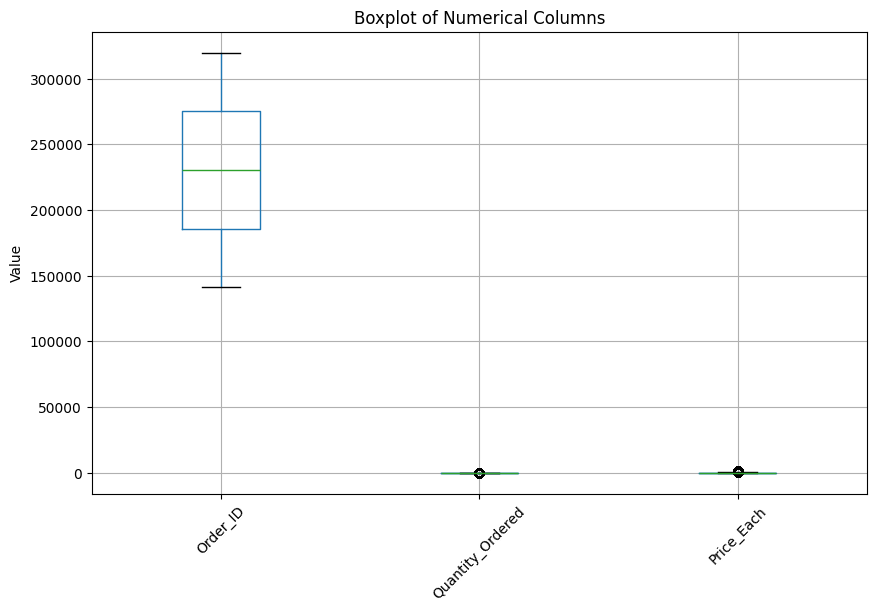

In [55]:
#check for outliers by using boxplot
df = pd.DataFrame(df)

# Select numerical columns for the boxplot
numerical_columns = ['Order_ID', 'Quantity_Ordered', 'Price_Each']

# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.show()

In [56]:
# Calculate summary statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_ID,185950.0,230417.569379,141234.0,185831.25,230367.5,275035.75,319670.0,51512.73711
Quantity_Ordered,185950.0,1.124383,1.0,1.0,1.0,1.0,9.0,0.442793
Price_Each,185950.0,184.399734,2.99,11.95,14.95,150.0,1700.0,332.731329
Order_Date,174783,2017-11-16 00:39:03.531350272,2001-07-19 06:08:00,2015-10-19 19:30:30,2019-03-24 18:08:00,2019-06-12 20:42:30,2031-12-19 23:53:00,NaN
Month,186850.0,7.060401,1.0,4.0,7.0,10.0,12.0,3.502475


In [57]:
#check for outliers by using quartiles and IQR


# Calculate quartiles and IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Print quartiles, and IQR

print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)

Q1:
 Order_ID            185831.25
Quantity_Ordered         1.00
Price_Each              11.95
Name: 0.25, dtype: float64
Q3:
 Order_ID            275035.75
Quantity_Ordered         1.00
Price_Each             150.00
Name: 0.75, dtype: float64
IQR:
 Order_ID            89204.50
Quantity_Ordered        0.00
Price_Each            138.05
dtype: float64


In [58]:
#handle missing values using imputation technique
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
columns_with_missing_values

['Order_ID',
 'Product',
 'Quantity_Ordered',
 'Price_Each',
 'Order_Date',
 'Purchase_Address']

In [59]:
# Perform imputation for numeric columns using mean
numeric_imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

In [60]:
# Perform imputation for categorical columns using mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [61]:
# Verify if all missing values have been imputed
print(df.isnull().sum())

Order_ID                0
Product                 0
Quantity_Ordered        0
Price_Each              0
Order_Date          12067
Purchase_Address        0
Month                   0
dtype: int64


In [62]:
# Perform forward fill imputation for date columns
date_columns =['Order_Date']  

df[date_columns] = df[date_columns].fillna(method='ffill')

In [63]:
# Verify if all missing values have been imputed
print(df.isnull().sum())

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
Month               0
dtype: int64


In [64]:
# checking the columns 
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,141234.0,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0
1,141235.0,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0
2,141236.0,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0
3,141237.0,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0
4,141238.0,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0
...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2015-12-19 11:13:00,"14 Madison St, San Francisco, CA 94016",12.0
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",12.0
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",12.0
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",12.0


In [65]:
# Identify duplicates in the dataset
duplicates = df.duplicated()

# Count the number of duplicate rows
duplicate_count = duplicates.sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 264


In [66]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [67]:
# Verify if duplicates have been removed
duplicates_after_removal = df.duplicated()
duplicate_count_after_removal = duplicates_after_removal.sum()
print('Number of duplicate rows after removal:', duplicate_count_after_removal)

Number of duplicate rows after removal: 0


In [68]:
# Save data without duplicate and missing values(Cleaned data)
df.to_csv('cleaned_dataset.csv', index=False)

In [69]:
data = pd.read_csv('cleaned_dataset.csv')
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0


## Exploratory Data Analysis (EDA)

### Univariate


In [70]:
# Numerical variables
numerical_vars = ['Quantity_Ordered', 'Price_Each']
data[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity_Ordered,186586.0,1.124543,0.441999,1.00,1.00,1.00,1.0,9.0
Price_Each,186586.0,184.518678,332.040125,2.99,11.95,14.95,150.0,1700.0


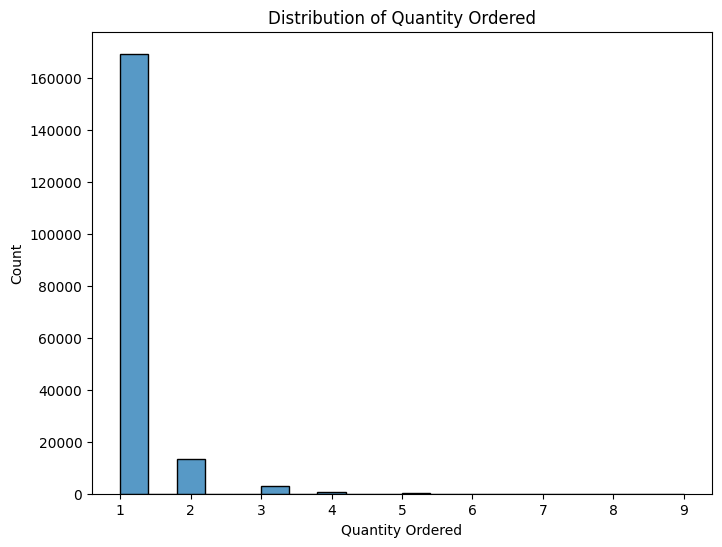

In [71]:
# Histogram for Quantity_Ordered
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Quantity_Ordered', bins=20)
plt.xlabel('Quantity Ordered')
plt.ylabel('Count')
plt.title('Distribution of Quantity Ordered')
plt.show()

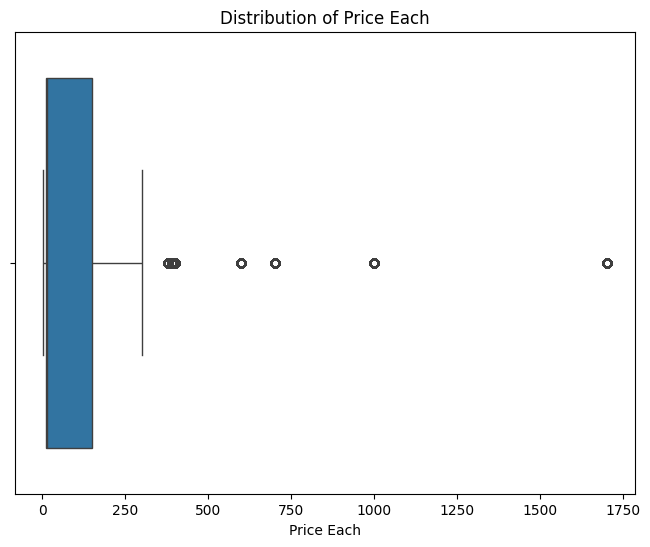

In [72]:
# Boxplot for Price_Each
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Price_Each')
plt.xlabel('Price Each')
plt.title('Distribution of Price Each')
plt.show()

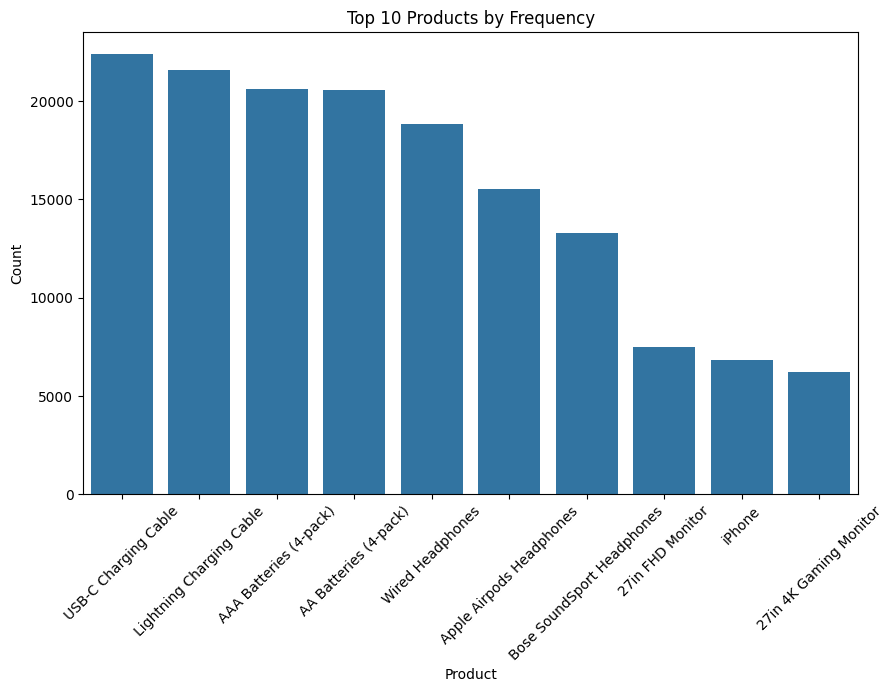

In [73]:
# Count the frequency of each product
product_counts = data['Product'].value_counts()

# Select the top 10 products
top_10_products = product_counts.head(10)

# Plot the frequency distribution of the top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products by Frequency')
plt.xticks(rotation=45)
plt.show()

### Bivariate

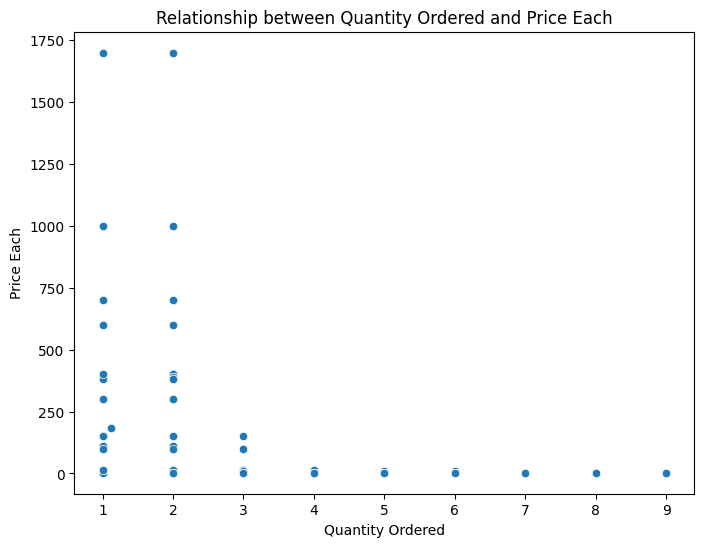

In [75]:
# Scatter plot for Quantity_Ordered and Price_Each
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Quantity_Ordered', y='Price_Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.title('Relationship between Quantity Ordered and Price Each')
plt.show()

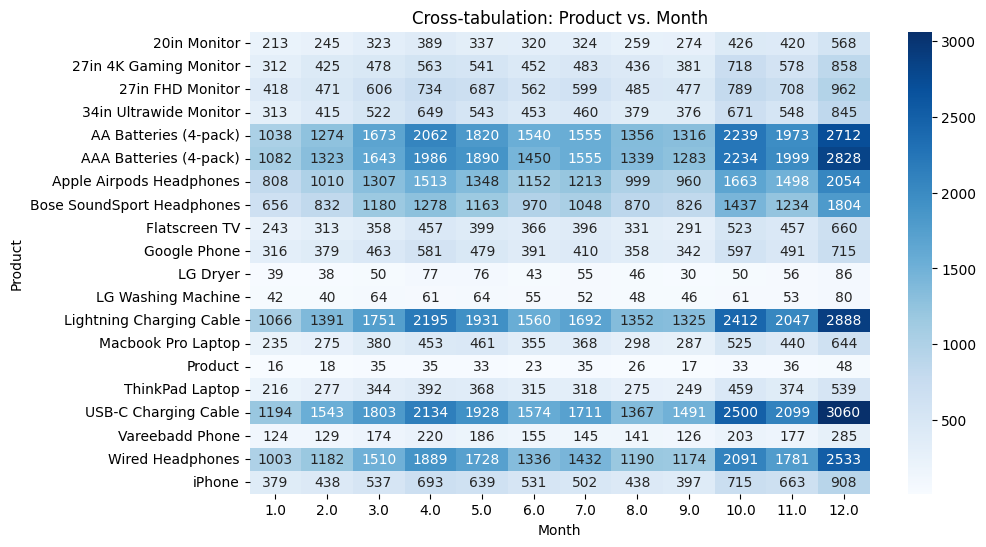

In [76]:
# Cross-tabulation between Product and Month
cross_tab = pd.crosstab(data['Product'], data['Month'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Month')
plt.ylabel('Product')
plt.title('Cross-tabulation: Product vs. Month')
plt.show()

### Multivariate


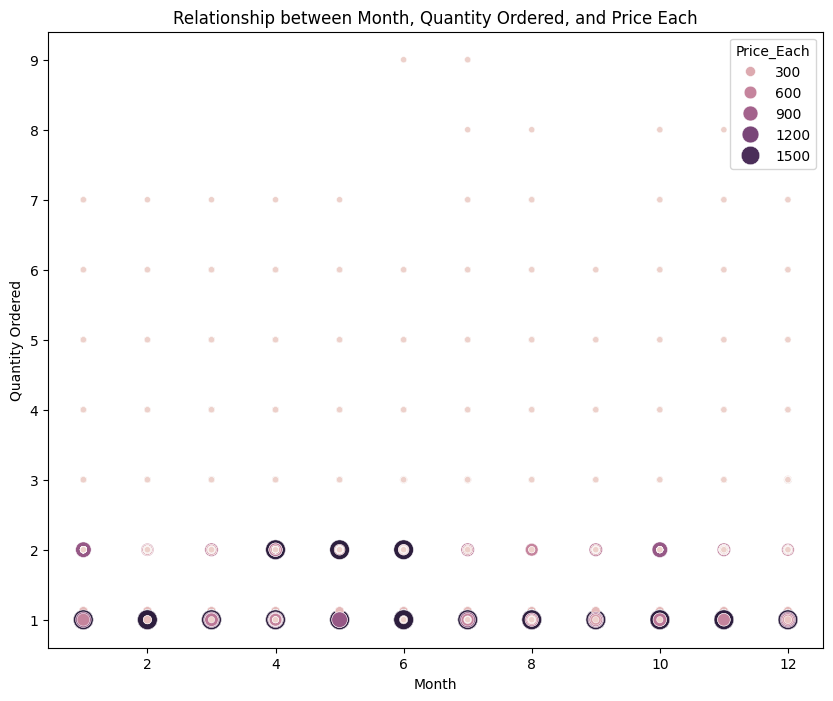

In [77]:
# Scatter plot with Month, Quantity_Ordered, and Price_Each
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Month', y='Quantity_Ordered', hue='Price_Each', size='Price_Each', sizes=(20, 200))
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.title('Relationship between Month, Quantity Ordered, and Price Each')
plt.show()

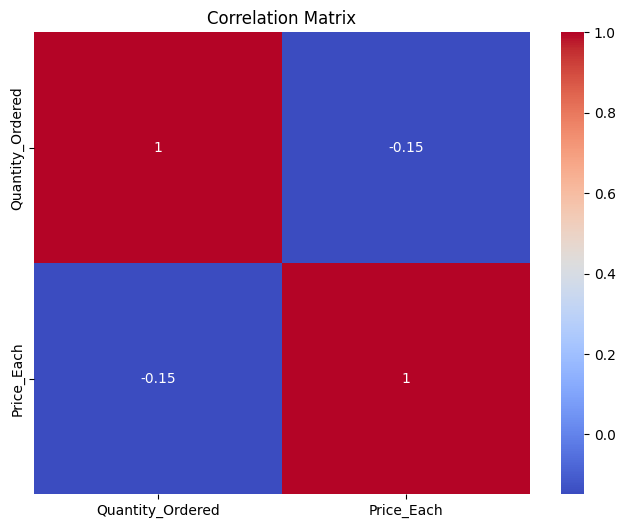

In [78]:
# Correlation matrix for numerical variables
corr_matrix = data[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

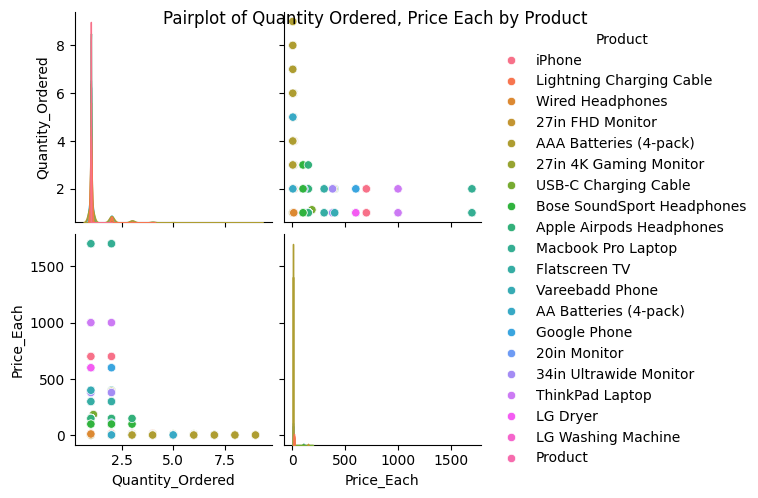

In [79]:
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Quantity_Ordered', 'Price_Each', 'Product']], hue='Product')
plt.suptitle('Pairplot of Quantity Ordered, Price Each by Product')
plt.show()